<a href="https://colab.research.google.com/github/ZacharySBrown/vcu-scma440-2021q1/blob/master/examples/3a_moving_averages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup and Fetch Data

Press the play button in Google Colab or press `Shift+Enter` execute the cell below to download and load the data and packages for this assignment

This will load four `pandas` `DataFrame` objects: `shampoo`,`housing`, `airline`, and `airline_series`.
Each of these is used in Makridakis Chapter 3. 

In [20]:
import pandas as pd
from numpy import log, abs, mean, exp
from IPython.display import display
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 16

!curl https://raw.githubusercontent.com/ZacharySBrown/vcu-scma440-2021q1/master/utils/fetch_e3.sh > fetch_e3.sh
!bash fetch_e3.sh

# Example
shampoo = pd.read_csv('shampoo_sales.csv', parse_dates=['date']).set_index('date')
housing = pd.read_csv('housing_sales.csv', parse_dates=['date']).set_index('date')
airline = pd.read_csv('airline.csv').set_index('year')
airline_series = pd.read_csv('airline_series.csv', parse_dates=['date']).set_index('date')


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   380  100   380    0     0   2420      0 --:--:-- --:--:-- --:--:--  2420
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   629  100   629    0     0   4694      0 --:--:-- --:--:-- --:--:--  4694
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3867  100  3867    0     0  38670      0 --:--:-- --:--:-- --:--:-- 38670
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   456  100   456    0     0   3707      0 --:--:-- --:--:-- --:--:--  3707
  % Total    % Received % Xferd  Average Speed   Tim

# Taking a look at the data

Let's start by taking a look at a simple time series plot of the data sets, as well as the first 10 rows of the data by using the `.head()` function

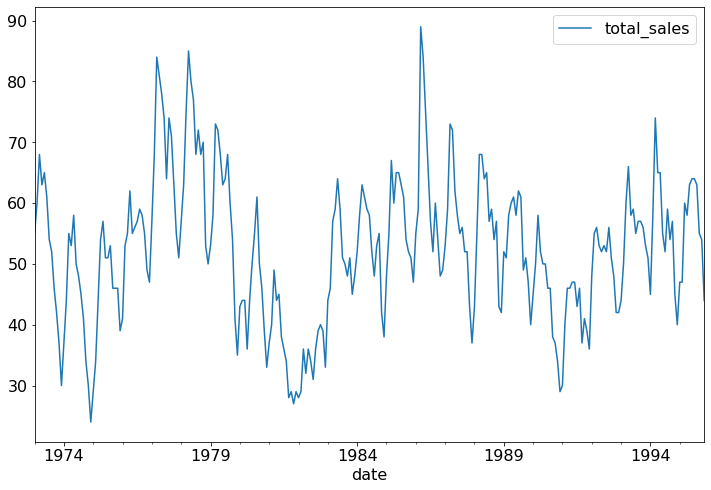

In [21]:
housing.plot()

In [22]:
housing.head(10)

,total_sales
date,
1973-01-01,55
1973-02-01,60
1973-03-01,68
1973-04-01,63
1973-05-01,65
1973-06-01,61
1973-07-01,54
1973-08-01,52
1973-09-01,46


# Calculating a Simple Moving Average

To calculate a simple moving average from a column in a `pandas` `DataFrame`, you can use the `.rolling()` function, followed by `.mean()`. Note that other simple statistics (such as `.median()`, `.std()`, etc.) can be used as well!

The `.rolling()` function takes several arguments which are of interest for us:

* **`window`**: Specifies the window size for the moving average, e.g. an **MA3** moving average would have a window size of 3
* **`center`**: Specifies whether to center the output series values on the middle of the window. *Note: we (almost) always want to specify this to be true!*
* **`min_periods`**: Specifies the minimum number of periods that need to be included for a rolling calculation to be output. Setting this equal to `1` allows us to compute partial averages for the beginning and end of time series

To apply a simple **MA3** moving average for the `total_sales` column of a `DataFrame`, we would call:

`data['MA3'] = data['total_sales'].rolling(3, center=True, min_periods=1).mean()`

,total_sales,3MA,5MA
date,,,
1973-01-01,266.0,NaN,NaN
1973-02-01,145.9,198.333333,NaN
1973-03-01,183.1,149.433333,178.92
1973-04-01,119.3,160.900000,159.42
1973-05-01,180.3,156.033333,176.60


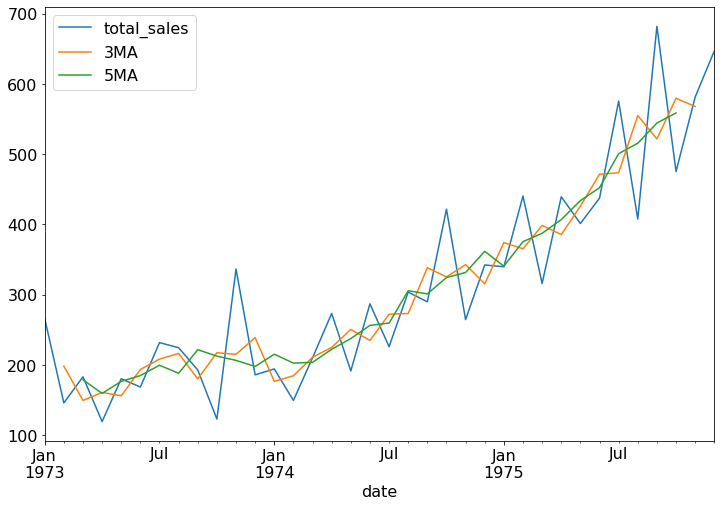

In [23]:
shampoo['3MA'] = shampoo['total_sales'].rolling(3, center=True).mean()
shampoo['5MA'] = shampoo['total_sales'].rolling(5, center=True).mean()
display(shampoo.head())
shampoo.plot()

# Double Moving Averages

For a double moving average, we can first calculate the even-moving average in one column, then take the average of that in the next column. Note that the `rolling()` function will produce output shifted forward by one from what we need for our double moving average, so we'll have to use the `pandas` `shift()` function to move it back by one. This ensures that the centered moving average is centered on the correct value (e.g. the first value of our `2x4MA` lines up with the third element in the time series). 

In [24]:
shampoo['4MA_shifted'] = shampoo['total_sales'].rolling(4, center=True).mean()
shampoo['4MA'] = shampoo['4MA_shifted'].shift(-1)
shampoo['2x4MA'] = shampoo['4MA'].rolling(2, center=True).mean()
shampoo.head(10)

,total_sales,3MA,5MA,4MA_shifted,4MA,2x4MA
date,,,,,,
1973-01-01,266.0,NaN,NaN,NaN,NaN,NaN
1973-02-01,145.9,198.333333,NaN,NaN,178.575,NaN
1973-03-01,183.1,149.433333,178.92,178.575,157.150,167.8625
1973-04-01,119.3,160.900000,159.42,157.150,162.800,159.9750
1973-05-01,180.3,156.033333,176.60,162.800,174.975,168.8875
1973-06-01,168.5,193.533333,184.88,174.975,201.275,188.1250
1973-07-01,231.8,208.266667,199.58,201.275,204.400,202.8375
1973-08-01,224.5,216.366667,188.10,204.400,193.000,198.7000
1973-09-01,192.8,180.066667,221.70,193.000,219.175,206.0875


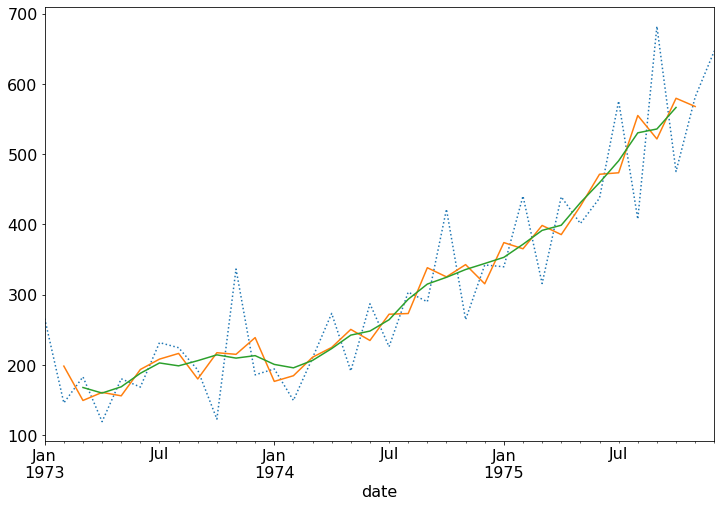

In [25]:
shampoo['total_sales'].plot(linestyle='dotted')
shampoo['3MA'].plot()
shampoo['2x4MA'].plot()

Notice that the above has missing values at the beginning and the end of the smoothed series. We can tell `rolling` to calculate partial averages by setting `min_periods=1`

,total_sales,3MA,5MA,4MA_shifted,4MA,2x4MA
date,,,,,,
1973-01-01,266.0,205.950000,198.333333,205.950000,198.333333,198.333333
1973-02-01,145.9,198.333333,178.575000,198.333333,178.575000,188.454167
1973-03-01,183.1,149.433333,178.920000,178.575000,157.150000,167.862500
1973-04-01,119.3,160.900000,159.420000,157.150000,162.800000,159.975000
1973-05-01,180.3,156.033333,176.600000,162.800000,174.975000,168.887500


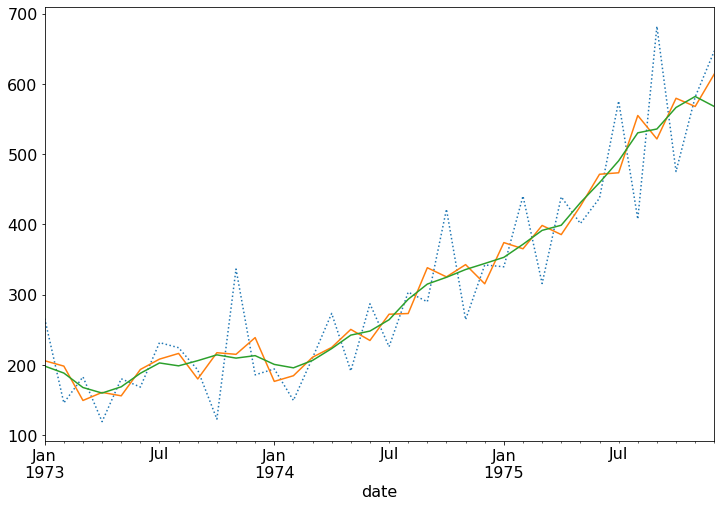

In [27]:
shampoo['3MA'] = shampoo['total_sales'].rolling(3, center=True, min_periods=1).mean()
shampoo['5MA'] = shampoo['total_sales'].rolling(5, center=True, min_periods=1).mean()
shampoo['4MA_shifted'] = shampoo['total_sales'].rolling(4, center=True, min_periods=1).mean()
shampoo['4MA'] = shampoo['4MA_shifted'].shift(-1)
shampoo['2x4MA'] = shampoo['4MA'].rolling(2, center=True, min_periods=1).mean()

display(shampoo.head())
shampoo['total_sales'].plot(linestyle='dotted')
shampoo['3MA'].plot()
shampoo['2x4MA'].plot()

# Estimating Trend in Presence of Seasonality

When the data exhibits strong seasonality, the (centered) moving average smoother should be chosen such that it averages over the seasonal period.

In [28]:
housing['2x12MA'] = housing['total_sales'].rolling(12, center=True).mean().shift(-1).rolling(2, center=2).mean()
housing['7MA'] = housing['total_sales'].rolling(7, center=True).mean()
housing.head(10)

,total_sales,2x12MA,7MA
date,,,
1973-01-01,55,NaN,NaN
1973-02-01,60,NaN,NaN
1973-03-01,68,NaN,NaN
1973-04-01,63,NaN,60.857143
1973-05-01,65,NaN,60.428571
1973-06-01,61,NaN,58.428571
1973-07-01,54,52.000000,54.714286
1973-08-01,52,50.583333,51.000000
1973-09-01,46,49.375000,46.000000


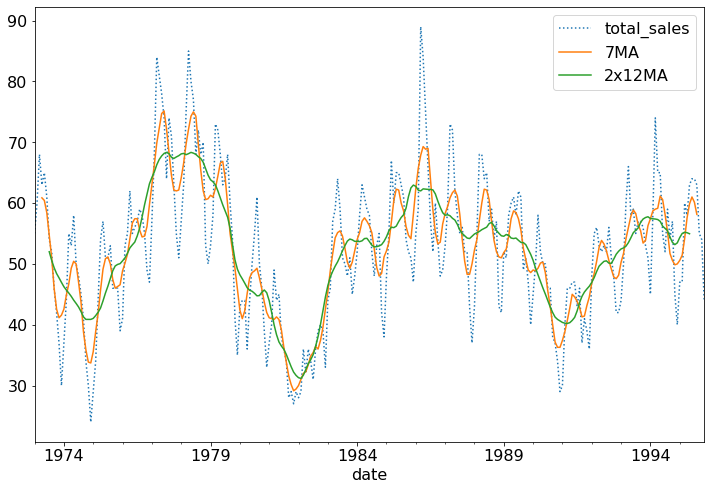

In [29]:
housing['total_sales'].plot(linestyle='dotted')
housing['7MA'].plot()
housing['2x12MA'].plot()
plt.legend()

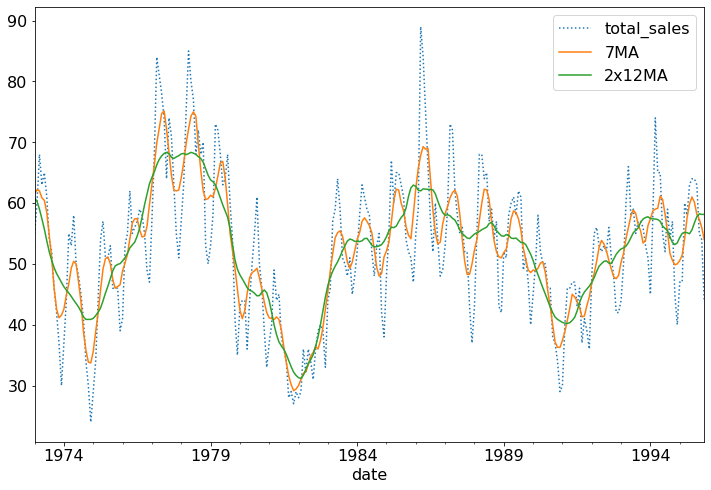

In [31]:
housing['2x12MA'] = housing['total_sales'].rolling(12, center=True, min_periods=1).mean().shift(-1).rolling(2, center=True, min_periods=1).mean()
housing['7MA'] = housing['total_sales'].rolling(7, center=True, min_periods=1).mean()

housing['total_sales'].plot(linestyle='dotted')
housing['7MA'].plot()
housing['2x12MA'].plot()
plt.legend()